In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\jaysu\anaconda3\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import numpy as np

# Read the CSV and Perform Basic Data Cleaning

In [8]:
df = pd.read_csv("../data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [35]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# Create an array from the values in the dataframe values
array = df.values
# Pull out features and labels from the columns with slice 
x= array[:, 1:]
Y= array[:, 0]
df.values[0]
feature_names = np.array(df.columns)
dict1 = pd.DataFrame(feature_names)
dict1.head(40)


,0
0,koi_disposition
1,koi_fpflag_nt
2,koi_fpflag_ss
3,koi_fpflag_co
4,koi_fpflag_ec
5,koi_period
6,koi_period_err1
7,koi_period_err2
8,koi_time0bk
9,koi_time0bk_err1


In [29]:
num_list = np.arange(1, 41, 1)
dict = {'feature_num' : num_list, 'feature_rank': features}
features_df_rank = pd.DataFrame(dict)
features_df_rank.sort_values(by='feature_rank', ascending=False).head(10)

,feature_num,feature_rank
1,2,0.155709
0,1,0.144127
2,3,0.137261
16,17,0.043032
3,4,0.042211
26,27,0.035977
15,16,0.031009
9,10,0.025793
8,9,0.022068
14,15,0.021910


In [20]:
# features: 1, 2, 3, 4, 9, 10
features = model.feature_importances_
len(features)

40

In [17]:
# Feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(x,Y)
print(model.feature_importances_)

[0.14412662 0.15570884 0.13726095 0.04221111 0.01581643 0.00967947
 0.01767927 0.0126043  0.02206828 0.02579275 0.01299416 0.00904947
 0.01230745 0.01641359 0.02190991 0.03100885 0.04303157 0.01215461
 0.01311364 0.01125771 0.00884527 0.00897646 0.01140159 0.00889946
 0.00943656 0.00846101 0.03597664 0.01186766 0.00818477 0.01332866
 0.01544211 0.01221929 0.01155272 0.01372113 0.00803706 0.00930142
 0.00789997 0.00994291 0.01020581 0.01011053]


In [3]:
# Set features. This will also be used as your x values.
# these features seem interesting according to the documentation ['koi_period', 'koi_impact', 'koi_duration', koi_prad', 'koi_teq', 'koi_slogg', 'koi_srad', ]
selected_features = df[['koi_period', 'koi_impact', 'koi_duration', 'koi_prad', 'koi_teq', 'koi_slogg', 'koi_srad']]
selected_features

,koi_period,koi_impact,koi_duration,koi_prad,koi_teq,koi_slogg,koi_srad
0,54.418383,0.586,4.50700,2.83,443,4.467,0.927
1,19.899140,0.969,1.78220,14.60,638,4.544,0.868
2,1.736952,1.276,2.40641,33.46,1395,4.564,0.791
3,2.525592,0.701,1.65450,2.75,1406,4.438,1.046
4,4.134435,0.762,3.14020,2.77,1160,4.486,0.972
...,...,...,...,...,...,...,...
6986,8.589871,0.765,4.80600,1.11,929,4.296,1.088
6987,0.527699,1.252,3.22210,29.35,2088,4.529,0.903
6988,1.739849,0.043,3.11400,0.72,1608,4.444,1.031
6989,0.681402,0.147,0.86500,1.07,2218,4.447,1.041


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
labels = df['koi_disposition']
labels

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, labels, train_size=.8, random_state=3 )

In [6]:
X_train.head()

,koi_period,koi_impact,koi_duration,koi_prad,koi_teq,koi_slogg,koi_srad
2471,24.674582,0.817,3.26480,2.33,544,4.562,0.812
1965,6.002548,0.914,4.16280,2.33,1209,4.269,1.360
6013,451.865790,0.379,13.47000,1.85,464,4.154,2.005
9,3.522498,0.631,3.19843,14.59,1521,4.169,1.451
2665,5.690592,0.573,2.55700,3.10,860,4.538,0.810


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

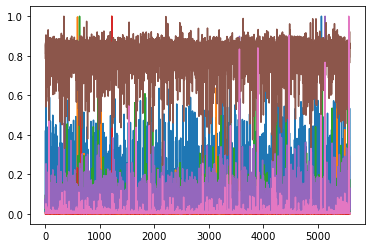

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

import matplotlib.pyplot as plt 
plt.plot(X_train_scaled)

# Train the Model



In [8]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {clf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {clf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.6397426733380986


In [9]:
# Test with random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf = rf.fit(X_train_scaled, y_train)

print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.7033595425303788


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [32]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [10],
#               'gamma': [0.0001]}
param_grid={'criterion' : ['gini', 'entropy'],'min_samples_split' : range(10,200,20),'max_depth': range(1,20,2)}
grid = GridSearchCV(clf, param_grid, verbose=3)

# To get list of parameters you can tune
clf.get_params().keys()
# grid.fit(X_train_scaled, y_train)

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [33]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

, max_depth=15, min_samples_split=110 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=110, score=0.668, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_split=110 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=110, score=0.652, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_split=110 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=110, score=0.663, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_split=110 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=110, score=0.665, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_split=110 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=110, score=0.673, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_split=130 ..........
[CV]  criterion=entropy, max_depth=15, min_samples_split=130, score=0.669, total=   0.0s
[CV] criterion=entropy, max_depth=15, min_samples_split=130 ..

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 200, 20)},
             verbose=3)

In [34]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 19, 'min_samples_split': 150}
0.6706005074170173


# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)